In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
#Read Data 


data= pd.read_excel('C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Dataset\\Final Output\\Weekly\\Data_Weekly.xlsx', index_col ='Date',parse_dates = True)


In [3]:
data.shape

(2127, 4)

In [4]:
import copy
data_df= copy.deepcopy(data)

In [5]:
data_df.head()

,Location,Item,Quantity,Amount
Date,,,,
2020-01-05,FREMONT,CHICKEN XXXXX - O,37.023380,184.746667
2020-01-12,FREMONT,CHICKEN XXXXX - O,41.889780,209.030000
2020-01-19,FREMONT,CHICKEN XXXXX - O,86.101210,429.645000
2020-01-26,FREMONT,CHICKEN XXXXX - O,63.834068,318.532000
2020-02-02,FREMONT,CHICKEN XXXXX - O,45.320977,226.151667


### Single Location and item Seasonality

In [6]:
data_df2= data_df[(data_df['Location']== 'FREMONT') & (data_df['Item']== 'CHICKEN XXXXX - O')]

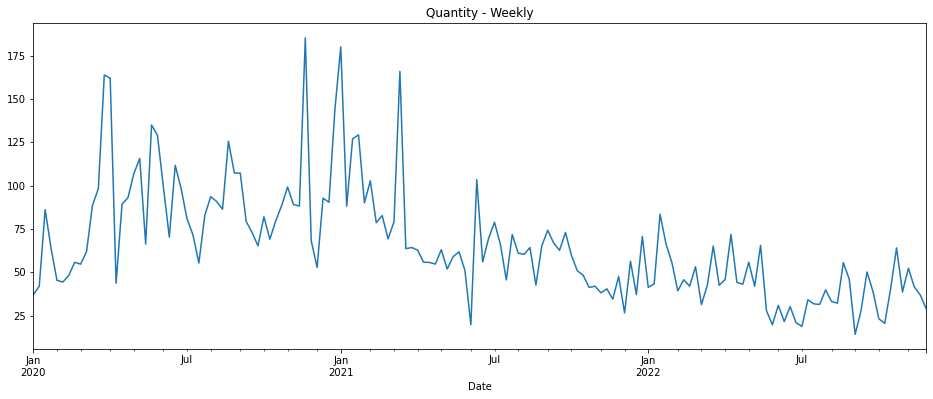

In [7]:
plt.figure(figsize=(16,6))
data_df2['Quantity'].plot()
plt.title('Quantity - Weekly')
plt.show()

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# data_df2['Date']= pd.to_datetime(data_df2['Date'])
result=seasonal_decompose(data_df2['Quantity'], 
                          model='multiplicable')

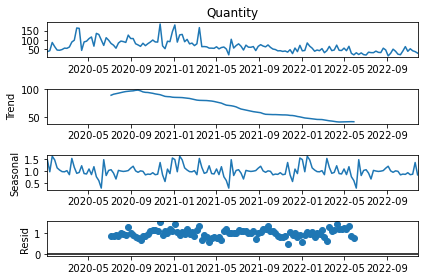

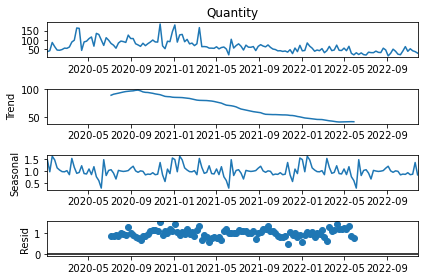

In [9]:
result.plot()

## Modelling

In [10]:
data_df.shape

(2127, 4)

In [11]:
data_df.head()

,Location,Item,Quantity,Amount
Date,,,,
2020-01-05,FREMONT,CHICKEN XXXXX - O,37.023380,184.746667
2020-01-12,FREMONT,CHICKEN XXXXX - O,41.889780,209.030000
2020-01-19,FREMONT,CHICKEN XXXXX - O,86.101210,429.645000
2020-01-26,FREMONT,CHICKEN XXXXX - O,63.834068,318.532000
2020-02-02,FREMONT,CHICKEN XXXXX - O,45.320977,226.151667


In [84]:
# df_new = data_df_new.loc[data_df_new['Date'] <= '2022-04-01']

In [106]:
# df_new.shape

In [107]:
# df_new

In [12]:
data_df2 = data_df[(data_df['Location']=='HAYWARD') & (data_df['Item']== 'FILLET QQQQ')]

In [13]:
data_df2

,Location,Item,Quantity,Amount
Date,,,,
2020-01-05,HAYWARD,FILLET QQQQ,65.401283,457.155000
2020-01-12,HAYWARD,FILLET QQQQ,55.853830,411.631429
2020-01-19,HAYWARD,FILLET QQQQ,51.600041,386.484286
2020-01-26,HAYWARD,FILLET QQQQ,49.255580,368.924286
2020-02-02,HAYWARD,FILLET QQQQ,54.503147,408.228571
...,...,...,...,...
2022-10-30,HAYWARD,FILLET QQQQ,58.501193,525.925714
2022-11-06,HAYWARD,FILLET QQQQ,59.796919,537.574286
2022-11-13,HAYWARD,FILLET QQQQ,56.444627,507.437143


In [14]:
data_df2 = data_df2.drop(['Location', 'Item', 'Amount'], axis=1)

In [16]:
data_df2= data_df2.reset_index()

In [17]:
train = data_df2[data_df2['Date']<= '2022-05-01']
test = data_df2[data_df2['Date']>= '2022-05-01']


In [18]:
train.tail()

,Date,Quantity
117,2022-04-03,43.015232
118,2022-04-10,40.339430
119,2022-04-17,61.482602
120,2022-04-24,42.748017
121,2022-05-01,48.851277


In [19]:
train= train.set_index('Date')
test= test.set_index('Date')

In [20]:
train.shape, test.shape

((122, 1), (31, 1))

In [21]:
# data_df2

In [22]:
# data_df2.shape

In [23]:
# a= int(len(data_df2)*0.80)

# train,test = data_df2[:a], data_df2[a:]


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train) 

train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)


In [24]:
train.shape, test.shape

((122, 1), (31, 1))

In [25]:
test.head()

,Quantity
Date,
2022-05-01,48.851277
2022-05-08,61.969966
2022-05-15,45.556532
2022-05-22,55.421352
2022-05-29,62.942934


In [26]:
#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past=seq_size = 7  # Number of past days we want to use to predict the future.
n_features = 1 ## number of features. This dataset is univariate so it is 1

#Reformat input data into a shape: (n_samples x timesteps x n_features)

for i in range(n_past, len(train_scaled) - n_future +1):
    trainX.append(train_scaled[i - n_past:i, 0:train.shape[1]])
    trainY.append(train_scaled[i + n_future - 1:i + n_future, 0])
    
    

In [27]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (115, 7, 1).
trainY shape == (115, 1).


In [28]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
# model.add(Dropout(0.2))
model.add(LSTM(16, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(Dropout(0.2))
model.add(LSTM(8, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dropout(0.2))
model.add(Dense(5))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mae')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 7, 64)             49408     
                                                                 
 lstm_2 (LSTM)               (None, 7, 64)             33024     
                                                                 
 lstm_3 (LSTM)               (None, 7, 32)             12416     
                                                                 
 dropout (Dropout)           (None, 7, 32)             0         
                                                                 
 lstm_4 (LSTM)               (None, 7, 16)             3136      
                                                                 
 dropout_1 (Dropout)         (None, 7, 16)             0

In [29]:
history = model.fit(trainX, trainY, epochs=30, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/30
6/6 [==============================] - 10s 213ms/step - loss: 0.4414 - val_loss: 0.2860
Epoch 2/30
6/6 [==============================] - 0s 21ms/step - loss: 0.4085 - val_loss: 0.2505
Epoch 3/30
6/6 [==============================] - 0s 19ms/step - loss: 0.3672 - val_loss: 0.2082
Epoch 4/30
6/6 [==============================] - 0s 21ms/step - loss: 0.3249 - val_loss: 0.1551
Epoch 5/30
6/6 [==============================] - 0s 18ms/step - loss: 0.2642 - val_loss: 0.1031
Epoch 6/30
6/6 [==============================] - 0s 19ms/step - loss: 0.2218 - val_loss: 0.1096
Epoch 7/30
6/6 [==============================] - 0s 19ms/step - loss: 0.2237 - val_loss: 0.1138
Epoch 8/30
6/6 [==============================] - 0s 19ms/step - loss: 0.2174 - val_loss: 0.1041
Epoch 9/30
6/6 [==============================] - 0s 21ms/step - loss: 0.1827 - val_loss: 0.1042
Epoch 10/30
6/6 [==============================] - 0s 20ms/step - loss: 0.1820 - val_loss: 0.1135
Epoch 11/30
6/6 [==========

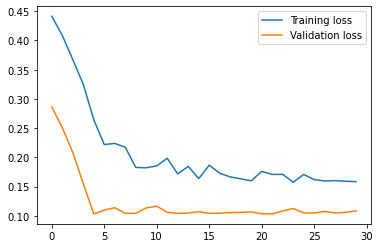

In [30]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [31]:
trainPredict = model.predict(trainX)
train_inverse = scaler.inverse_transform(train_scaled)

4/4 [==============================] - 1s 10ms/step


In [32]:
trainPredict.shape,train_inverse.shape

((115, 1), (122, 1))

In [33]:
n_past=7        #1 means-1 week back
train_inverse[n_past:].shape

(115, 1)

In [34]:

# calculate root mean squared error
import math
from sklearn.metrics import mean_squared_error
n_past=7

trainScore = mean_squared_error(train_inverse[n_past:], trainPredict[:,0])
print('Train Score: %.2f MSE' % (trainScore))

trainScore = math.sqrt(mean_squared_error(train_inverse[n_past:], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))


Train Score: 3530.78 MSE
Train Score: 59.42 RMSE


In [35]:
testPredict = model.predict(test)
test_inverse = scaler.inverse_transform(test_scaled)

1/1 [==============================] - 1s 906ms/step


In [61]:
# calculate root mean squared error

testScore = mean_squared_error(test_inverse[:], testPredict[:,0]).round(2)
print('Test Score: %.2f MSE' % (testScore))

testScore = math.sqrt(mean_squared_error(test_inverse[:], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (round(testScore, 2)))

Test Score: 3331.53 MSE
Test Score: 57.72 RMSE


In [52]:
from sklearn.metrics import mean_absolute_percentage_error

MAPE_Score= mean_absolute_percentage_error(test_inverse[:], testPredict[:,0]).round(2)
print('MAPE_Score:', MAPE_Score)

MAPE_Score: 0.99


In [38]:
n_past= seq_size= 1          # 1 means-1 week back
n_days_for_prediction = 36  #let us predict past 12 days


# from pandas.tseries.holiday import USFederalHolidayCalendar
# from pandas.tseries.offsets import CustomBusinessDay
# us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())


# train_dates = pd.to_datetime(data_df2['Date'])
time_series = test.index



In [39]:
time_series

DatetimeIndex(['2022-05-01', '2022-05-08', '2022-05-15', '2022-05-22',
               '2022-05-29', '2022-06-05', '2022-06-12', '2022-06-19',
               '2022-06-26', '2022-07-03', '2022-07-10', '2022-07-17',
               '2022-07-24', '2022-07-31', '2022-08-07', '2022-08-14',
               '2022-08-21', '2022-08-28', '2022-09-04', '2022-09-11',
               '2022-09-18', '2022-09-25', '2022-10-02', '2022-10-09',
               '2022-10-16', '2022-10-23', '2022-10-30', '2022-11-06',
               '2022-11-13', '2022-11-20', '2022-11-27'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [40]:
# time_series[-1]

In [41]:
# pd.date_range(list(time_series)[-1], periods=n_days_for_prediction, freq='D')

In [42]:
# predict_period_dates = pd.date_range(list(time_series)[-1], periods=n_days_for_prediction, freq='W').tolist()
# print(predict_period_dates)



In [43]:
# len(trainX)

In [44]:
# len(trainX[-n_days_for_prediction:])

In [45]:
prediction = model.predict(test)

1/1 [==============================] - 0s 31ms/step


In [46]:
prediction.shape

(31, 1)

In [47]:
### Inverse transform to before scaling so we get actual numbers
rescaled_prediction = scaler.inverse_transform(prediction)[:,0]

# Convert timestamp to date
forecast_dates = []
for time_i in time_series:
    forecast_dates.append(time_i.date())
    
df_forecast= pd.DataFrame({'Date':np.array(forecast_dates), 'Quantity':rescaled_prediction})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


In [48]:
df_forecast

,Date,Quantity
0,2022-05-01,63.971012
1,2022-05-08,59.817444
2,2022-05-15,64.759277
3,2022-05-22,61.995155
4,2022-05-29,59.492817
5,2022-06-05,65.151009
6,2022-06-12,62.562576
7,2022-06-19,59.531990
8,2022-06-26,58.613632
9,2022-07-03,58.412502


In [49]:
#reset index
# data_df3= data_df2.reset_index()

original = data_df2[['Date', 'Quantity']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-05-01']

In [50]:
original

,Date,Quantity
17,2020-05-03,91.691595
18,2020-05-10,66.485787
19,2020-05-17,85.927339
20,2020-05-24,89.692927
21,2020-05-31,74.962173
...,...,...
147,2022-10-30,58.501193
148,2022-11-06,59.796919
149,2022-11-13,56.444627
150,2022-11-20,47.658516


C:\Users\Ramshankar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ramshankar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


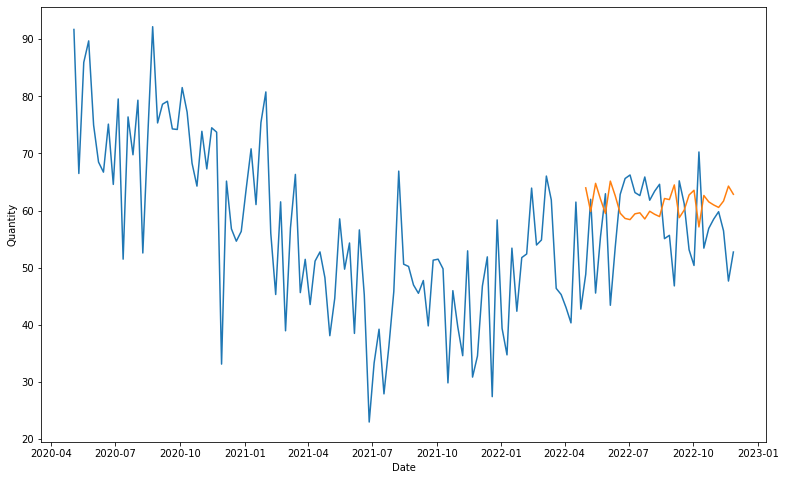

In [51]:
plt.figure(figsize=(13,8)) 
lineplt= sns.lineplot(original['Date'], original['Quantity'])
sns.lineplot(df_forecast['Date'], df_forecast['Quantity'])
# lineplt.set(title = 'SAN FRANCISCO--> BEEF OOOO - GT')
plt.show()

## All items and Locations

In [63]:
data_df

,Location,Item,Quantity,Amount
Date,,,,
2020-01-05,FREMONT,CHICKEN XXXXX - O,37.023380,184.746667
2020-01-12,FREMONT,CHICKEN XXXXX - O,41.889780,209.030000
2020-01-19,FREMONT,CHICKEN XXXXX - O,86.101210,429.645000
2020-01-26,FREMONT,CHICKEN XXXXX - O,63.834068,318.532000
2020-02-02,FREMONT,CHICKEN XXXXX - O,45.320977,226.151667
...,...,...,...,...
2022-10-30,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,113.512925,146.431667
2022-11-06,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,97.404393,125.651667
2022-11-13,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,93.240305,120.280000


In [56]:
# df_new = data_df_new.loc[data_df_new['Date'] <= '2022-04-01']

In [57]:
# df_new.tail()

In [59]:
data_df= data_df.copy()

In [64]:
data_df=data_df.reset_index()

In [65]:
for i in data_df["Location"].unique():
    df= data_df[data_df['Location']==i]
    print(i, " , ", list(df['Item'].unique()))

FREMONT  ,  ['CHICKEN XXXXX - O', 'DRUMSTICKS NNNN', 'FILLET QQQQ']
HAYWARD  ,  ['CHICKEN XXXXX - O', 'DRUMSTICKS NNNN', 'FILLET QQQQ']
LAKEWOOD  ,  ['CHICKEN XXXXX - O', 'DRUMSTICKS NNNN', 'FILLET QQQQ']
RICHMOND CA  ,  ['CHICKEN XXXXX - O', 'DRUMSTICKS NNNN', 'FILLET QQQQ']
S SAN FRANCISCO BUS CTR  ,  ['BEEF OOOO - GT', 'DRUMSTICKS NNNN']


In [66]:
for i in data_df['Location'].unique():
    df= data_df[data_df['Location']==i]
    for j in df['Item'].unique():
        item_data= df[df["Item"]==j]

        item_data= item_data.drop(['Location', 'Item', 'Amount'], axis=1)
        train_dates = pd.to_datetime(item_data['Date'])  #collecting date 
#         item_data = item_data.set_index('Date')
#         print(item_data)
        
        #Modelling 
        train = item_data[item_data['Date']<= '2022-05-01']
        test = item_data[item_data['Date']>= '2022-05-01']
        
        train= train.set_index('Date')
        test= test.set_index('Date')
        #Splitting 
#         a= int(len(item_data)*0.75)
#         train,test = item_data[:a], item_data[a:]
        
        #COnverting into same scale 
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        scaler.fit(train) 
        
        #Transforming train and test 
        train_scaled = scaler.transform(train)
        test_scaled = scaler.transform(test)
        
        #Empty lists to be populated using formatted training data
        trainX = []
        trainY = []

        n_future = 1   # Number of days we want to look into the future based on the past days.
        n_past=seq_size = 7  # Number of past days we want to use to predict the future.
        n_features = 1 ## number of features. This dataset is univariate so it is 1

        #Reformat input data into a shape: (n_samples x timesteps x n_features)

        for num in range(n_past, len(train_scaled) - n_future +1):
            trainX.append(train_scaled[num - n_past:num, 0:train.shape[1]])
            trainY.append(train_scaled[num + n_future - 1:num + n_future, 0])
        
        #Converting to Numpy format
        trainX, trainY = np.array(trainX), np.array(trainY)
        
#         print(f'Location: {i} and  Item: {j}')
        
#         print('trainX shape == {}.'.format(trainX.shape))
#         print('trainY shape == {}.'.format(trainY.shape))
        
#         print("\n")
        print(f"LSTM Archtitecture {i}--> {j}")
        
        model = Sequential()
        model.add(LSTM(128, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
        model.add(LSTM(64, activation='relu', return_sequences=True))
        model.add(LSTM(64, activation='relu', return_sequences=True))
        model.add(LSTM(32, activation='relu', return_sequences=True))
        model.add(Dropout(0.2))
        # model.add(Dropout(0.2))
        model.add(LSTM(16, activation='relu', return_sequences=True))
        model.add(Dropout(0.2))
        model.add(Dropout(0.2))
        model.add(LSTM(8, activation='relu', return_sequences=False))
        model.add(Dropout(0.2))
        model.add(Dropout(0.2))
        model.add(Dense(5))
        model.add(Dense(1))

        model.compile(optimizer='adam', loss='mae')
#         model.summary()

#         model.summary()
#         print("\n")
        print(f"Model Training: {i}--> {j}")
        history = model.fit(trainX, trainY, epochs=30, batch_size=16, validation_split=0.2, verbose=1)
        
        #Plotting traning and validation curve 
        print("\n")
        print(f"Plot for: {i}--> {j}")
        title = i+"-->"+j
        
#         ax.set_title(title)
#         plt.plot(history.history['loss'], label='Training loss')
#         plt.plot(history.history['val_loss'], label='Validation loss')
#         ax.set_ylabel('Quantity')
#         ax.set_xlabel('Date')
#         plt.legend()
        
        print("\n")
        
        print(f"Model Forecasting initated: {i}--> {j}")

        n_past= seq_size= 1        #Number of past days we want to use to predict the future.
#         n_days_for_prediction = 36     #let us predict past 12 days
        
        time_series = test.index  #Get dates for test data
        
        #Creating date time periods for next 90 days 
#         predict_period_dates = pd.date_range(list(time_series)[-n_past], periods=n_days_for_prediction, freq='W').tolist()
        
        print(f"Model prediction initiated : {i}--> {j}")
        #Make prediction
        prediction = model.predict(test) #shape = (n, 1) where n is the n_days_for_prediction
        
        ### Inverse transform to before scaling so we get actual numbers
        rescaled_prediction = scaler.inverse_transform(prediction)[:,0]
        
        print(f"Model prediction completed : {i}--> {j}")
        # Convert timestamp to date
        forecast_dates = []
        for time_i in time_series:
            forecast_dates.append(time_i.date())
        
        print(f"Storing prediction into DataFrame : {i}--> {j}")
        print("\n")
        
        #Creating/saving prediction into dataframe 
        df_forecast= pd.DataFrame({'Date':np.array(forecast_dates), 'Forecasted_Qty':rescaled_prediction})
        df_forecast['Date']=pd.to_datetime(df_forecast['Date'])
        
        
        
        #reset index
#         data_df2= item_data.reset_index()
        
#         original = data_df2[['Date', 'Quantity']]
#         original['Date']=pd.to_datetime(original['Date'])
#         original = original.loc[original['Date'] >= '2020-01-02']
        
#         original= original.tail(90)
        
#         print("\n")
        print(f"Plotting prediction with original data : {i}--> {j}")
        
#         plt.figure(figsize=(10,10)) 
#         sns.lineplot(original['Date'], original['Quantity'])
#         sns.lineplot(df_forecast['Date'], df_forecast['Quantity'])
#         print(f"Model Forecasting complted  : {i}--> {j}")
   
        print("\n")
        print(f"Calculating MSE and RMSE : {i}--> {j}")
        #Prediction testing
        testPredict = model.predict(test)
        test_inverse = scaler.inverse_transform(test_scaled)

        import math
        from sklearn.metrics import mean_squared_error
#         n_past1=7

        # calculate root mean squared error

        MSE_Score = mean_squared_error(test_inverse[:], testPredict[:,0]).round(2)
        print('Test Score: %.2f MSE' % (MSE_Score))

        RMSE_Score = math.sqrt(mean_squared_error(test_inverse[:], testPredict[:,0]))
        print('Test Score: %.2f RMSE' % (RMSE_Score))
        
        
        from sklearn.metrics import mean_absolute_percentage_error

        MAPE_Score= mean_absolute_percentage_error(test_inverse[:], testPredict[:,0]).round(2)
        print('MAPE_Score:', MAPE_Score)
       
    
        #Saving Results 
        df_forecast['Location']= i
        df_forecast['Item']=j
        
        print("\n")
        print(f'Writing predicted results of {i} and {j}')
        predction_output = "ModelOut\All_out\Weekly\LSTM\Output\Output -" +i+"-"+j+".xlsx"
        df_forecast.to_excel(predction_output, index= False)
        
        col_names =  ['MSE_LSTM', 'RMSE_LSTM', 'MAPE_LSTM']
        Error_matric= pd.DataFrame(columns = col_names)
        
        my_out = {'MSE_LSTM': MSE_Score, 'RMSE_LSTM': RMSE_Score, 'MAPE_LSTM': MAPE_Score}
        Error_matric.loc[len(Error_matric)] = my_out 
        
        Error_matric['Location']=i
        Error_matric['Item']=j
        
        print(f'Writing error matrices of {i} and {j}')
        print("\n")
        Error_output = "ModelOut\All_out\Weekly\LSTM\Error\Output_Error -" +i+"-"+j+".xlsx"
        Error_matric.to_excel(Error_output, index= False)
        
        
        

LSTM Archtitecture FREMONT--> CHICKEN XXXXX - O
Model Training: FREMONT--> CHICKEN XXXXX - O
Epoch 1/30
6/6 [==============================] - 10s 215ms/step - loss: 0.3621 - val_loss: 0.1599
Epoch 2/30
6/6 [==============================] - 0s 18ms/step - loss: 0.3384 - val_loss: 0.1348
Epoch 3/30
6/6 [==============================] - 0s 18ms/step - loss: 0.3108 - val_loss: 0.1084
Epoch 4/30
6/6 [==============================] - 0s 21ms/step - loss: 0.2790 - val_loss: 0.0796
Epoch 5/30
6/6 [==============================] - 0s 18ms/step - loss: 0.2411 - val_loss: 0.0631
Epoch 6/30
6/6 [==============================] - 0s 19ms/step - loss: 0.2035 - val_loss: 0.0813
Epoch 7/30
6/6 [==============================] - 0s 20ms/step - loss: 0.1581 - val_loss: 0.1597
Epoch 8/30
6/6 [==============================] - 0s 20ms/step - loss: 0.1679 - val_loss: 0.1716
Epoch 9/30
6/6 [==============================] - 0s 22ms/step - loss: 0.1665 - val_loss: 0.1362
Epoch 10/30
6/6 [===============

1/1 [==============================] - 1s 997ms/step
Model prediction completed : HAYWARD--> CHICKEN XXXXX - O
Storing prediction into DataFrame : HAYWARD--> CHICKEN XXXXX - O


Plotting prediction with original data : HAYWARD--> CHICKEN XXXXX - O


Calculating MSE and RMSE : HAYWARD--> CHICKEN XXXXX - O
1/1 [==============================] - 0s 22ms/step
Test Score: 845.68 MSE
Test Score: 29.08 RMSE
MAPE_Score: 0.99


Writing predicted results of HAYWARD and CHICKEN XXXXX - O
Writing error matrices of HAYWARD and CHICKEN XXXXX - O


LSTM Archtitecture HAYWARD--> DRUMSTICKS NNNN
Model Training: HAYWARD--> DRUMSTICKS NNNN
Epoch 1/30
6/6 [==============================] - 11s 197ms/step - loss: 0.5314 - val_loss: 0.5882
Epoch 2/30
6/6 [==============================] - 0s 20ms/step - loss: 0.4929 - val_loss: 0.5425
Epoch 3/30
6/6 [==============================] - 0s 19ms/step - loss: 0.4422 - val_loss: 0.4845
Epoch 4/30
6/6 [==============================] - 0s 20ms/step - loss: 0.3805 

1/1 [==============================] - 0s 18ms/step
Test Score: 3332.17 MSE
Test Score: 57.72 RMSE
MAPE_Score: 0.99


Writing predicted results of HAYWARD and FILLET QQQQ
Writing error matrices of HAYWARD and FILLET QQQQ


LSTM Archtitecture LAKEWOOD--> CHICKEN XXXXX - O
Model Training: LAKEWOOD--> CHICKEN XXXXX - O
Epoch 1/30
6/6 [==============================] - 11s 238ms/step - loss: 0.3777 - val_loss: 0.2019
Epoch 2/30
6/6 [==============================] - 0s 24ms/step - loss: 0.3530 - val_loss: 0.1801
Epoch 3/30
6/6 [==============================] - 0s 22ms/step - loss: 0.3230 - val_loss: 0.1549
Epoch 4/30
6/6 [==============================] - 0s 22ms/step - loss: 0.2913 - val_loss: 0.1260
Epoch 5/30
6/6 [==============================] - 0s 23ms/step - loss: 0.2527 - val_loss: 0.0973
Epoch 6/30
6/6 [==============================] - 0s 23ms/step - loss: 0.2151 - val_loss: 0.1067
Epoch 7/30
6/6 [==============================] - 0s 24ms/step - loss: 0.1579 - val_loss: 0.1630
E

Model Training: LAKEWOOD--> FILLET QQQQ
Epoch 1/30
6/6 [==============================] - 10s 222ms/step - loss: 0.3980 - val_loss: 0.5030
Epoch 2/30
6/6 [==============================] - 0s 21ms/step - loss: 0.3663 - val_loss: 0.4667
Epoch 3/30
6/6 [==============================] - 0s 22ms/step - loss: 0.3316 - val_loss: 0.4295
Epoch 4/30
6/6 [==============================] - 0s 22ms/step - loss: 0.2874 - val_loss: 0.3877
Epoch 5/30
6/6 [==============================] - 0s 22ms/step - loss: 0.2519 - val_loss: 0.3444
Epoch 6/30
6/6 [==============================] - 0s 22ms/step - loss: 0.2144 - val_loss: 0.2865
Epoch 7/30
6/6 [==============================] - 0s 22ms/step - loss: 0.1987 - val_loss: 0.2662
Epoch 8/30
6/6 [==============================] - 0s 23ms/step - loss: 0.1822 - val_loss: 0.2808
Epoch 9/30
6/6 [==============================] - 0s 22ms/step - loss: 0.1828 - val_loss: 0.2879
Epoch 10/30
6/6 [==============================] - 0s 22ms/step - loss: 0.1756 - val_

Epoch 2/30
6/6 [==============================] - 0s 22ms/step - loss: 0.4317 - val_loss: 0.5407
Epoch 3/30
6/6 [==============================] - 0s 22ms/step - loss: 0.3905 - val_loss: 0.4838
Epoch 4/30
6/6 [==============================] - 0s 22ms/step - loss: 0.3217 - val_loss: 0.4065
Epoch 5/30
6/6 [==============================] - 0s 23ms/step - loss: 0.2711 - val_loss: 0.2714
Epoch 6/30
6/6 [==============================] - 0s 23ms/step - loss: 0.2232 - val_loss: 0.1434
Epoch 7/30
6/6 [==============================] - 0s 21ms/step - loss: 0.2130 - val_loss: 0.2028
Epoch 8/30
6/6 [==============================] - 0s 23ms/step - loss: 0.1745 - val_loss: 0.2261
Epoch 9/30
6/6 [==============================] - 0s 22ms/step - loss: 0.1807 - val_loss: 0.2126
Epoch 10/30
6/6 [==============================] - 0s 21ms/step - loss: 0.1706 - val_loss: 0.1814
Epoch 11/30
6/6 [==============================] - 0s 22ms/step - loss: 0.1909 - val_loss: 0.1648
Epoch 12/30
6/6 [===========

6/6 [==============================] - 0s 22ms/step - loss: 0.2605 - val_loss: 0.5311
Epoch 4/30
6/6 [==============================] - 0s 22ms/step - loss: 0.2298 - val_loss: 0.4909
Epoch 5/30
6/6 [==============================] - 0s 22ms/step - loss: 0.1977 - val_loss: 0.4437
Epoch 6/30
6/6 [==============================] - 0s 24ms/step - loss: 0.1706 - val_loss: 0.3752
Epoch 7/30
6/6 [==============================] - 0s 23ms/step - loss: 0.1564 - val_loss: 0.2925
Epoch 8/30
6/6 [==============================] - 0s 24ms/step - loss: 0.1334 - val_loss: 0.3143
Epoch 9/30
6/6 [==============================] - 0s 22ms/step - loss: 0.1490 - val_loss: 0.3411
Epoch 10/30
6/6 [==============================] - 0s 22ms/step - loss: 0.1520 - val_loss: 0.3485
Epoch 11/30
6/6 [==============================] - 0s 22ms/step - loss: 0.1461 - val_loss: 0.3487
Epoch 12/30
6/6 [==============================] - 0s 24ms/step - loss: 0.1373 - val_loss: 0.3392
Epoch 13/30
6/6 [=====================

In [68]:
import pandas as pd
import os
import glob

In [69]:
# use glob to get all the csv files
# in the folder
path = 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Code\\ModelOut\\All_out\\Weekly\\LSTM\\Output\\'
out_files = glob.glob(os.path.join(path, "*.xlsx"))

dfs= []


for f in out_files:
    dfs.append(pd.read_excel(f))
df=pd.concat(dfs, ignore_index=True)

In [70]:
df.to_excel('Output_all_LSTM_Weekly.xlsx', index=False)

In [71]:
path = 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Code\\ModelOut\\All_out\\Weekly\\LSTM\\Error\\'
error_files = glob.glob(os.path.join(path, "*.xlsx"))

len(error_files)

dfs_err= []


for f in error_files:
    dfs_err.append(pd.read_excel(f))
dfs_err=pd.concat(dfs_err, ignore_index=True)

In [72]:
dfs_err.to_excel('Error_Output_all_LSTM_Weekly.xlsx', index=False)

### Merging  Weekly resampled and forecasted data

In [362]:
df.head()

,Date,Forecasted_Qty,Location,Item
0,2022-05-01,60.282200,FREMONT,CHICKEN XXXXX - O
1,2022-05-08,57.177780,FREMONT,CHICKEN XXXXX - O
2,2022-05-15,63.012772,FREMONT,CHICKEN XXXXX - O
3,2022-05-22,55.130318,FREMONT,CHICKEN XXXXX - O
4,2022-05-29,54.509056,FREMONT,CHICKEN XXXXX - O


In [276]:
# Weekly resampled data, checking dates are matchinh or not  
# data_df_new[(data_df_new['Date']>= '2022-03-27') & (data_df_new['Location']== 'FREMONT')]

,Location,Item,Date,Quantity,Amount
116,FREMONT,CHICKEN XXXXX - O,2022-03-27,42.472460,254.410000
117,FREMONT,CHICKEN XXXXX - O,2022-04-03,45.782553,274.237500
118,FREMONT,CHICKEN XXXXX - O,2022-04-10,71.829710,430.260000
119,FREMONT,CHICKEN XXXXX - O,2022-04-17,44.067114,263.962000
120,FREMONT,CHICKEN XXXXX - O,2022-04-24,43.085138,258.080000
...,...,...,...,...,...
451,FREMONT,FILLET QQQQ,2022-10-30,39.327339,353.552857
452,FREMONT,FILLET QQQQ,2022-11-06,43.183700,388.221429
453,FREMONT,FILLET QQQQ,2022-11-13,46.081680,414.274286
454,FREMONT,FILLET QQQQ,2022-11-20,33.089784,297.477143


In [277]:
# data_df_new.tail()

,Location,Item,Date,Quantity,Amount
2122,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-10-30,113.512925,146.431667
2123,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-11-06,97.404393,125.651667
2124,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-11-13,93.240305,120.280000
2125,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-11-20,94.381132,121.751667
2126,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-11-27,88.660853,114.372500


In [280]:
# data_df_new.shape

(2127, 5)

In [284]:
df_season

,Date,Quantity,Amount,Trend,seasonality,remainder,Location,Item
0,2020-01-05,37.023380,184.746667,37.023380,1,1,FREMONT,CHICKEN XXXXX - O
1,2020-01-12,41.889780,209.030000,41.889780,1,1,FREMONT,CHICKEN XXXXX - O
2,2020-01-19,86.101210,429.645000,86.101210,1,1,FREMONT,CHICKEN XXXXX - O
3,2020-01-26,63.834068,318.532000,63.834068,1,1,FREMONT,CHICKEN XXXXX - O
4,2020-02-02,45.320977,226.151667,45.320977,1,1,FREMONT,CHICKEN XXXXX - O
...,...,...,...,...,...,...,...,...
2122,2022-10-30,113.512925,146.431667,113.512925,1,1,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2123,2022-11-06,97.404393,125.651667,97.404393,1,1,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2124,2022-11-13,93.240305,120.280000,93.240305,1,1,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2125,2022-11-20,94.381132,121.751667,94.381132,1,1,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN


In [7]:
data_weekly= pd.read_excel('C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Dataset\\Final Output\\Weekly\\Data_Weekly.xlsx')
data_weekly.head()


,Location,Item,Date,Quantity,Amount
0,FREMONT,CHICKEN XXXXX - O,2020-01-05,37.023380,184.746667
1,FREMONT,CHICKEN XXXXX - O,2020-01-12,41.889780,209.030000
2,FREMONT,CHICKEN XXXXX - O,2020-01-19,86.101210,429.645000
3,FREMONT,CHICKEN XXXXX - O,2020-01-26,63.834068,318.532000
4,FREMONT,CHICKEN XXXXX - O,2020-02-02,45.320977,226.151667


In [8]:
data_merge= pd.merge(data_weekly, df, on= ['Date', 'Item', 'Location'], how='left')

In [9]:
data_merge

,Location,Item,Date,Quantity,Amount,Forecasted_Qty
0,FREMONT,CHICKEN XXXXX - O,2020-01-05,37.023380,184.746667,NaN
1,FREMONT,CHICKEN XXXXX - O,2020-01-12,41.889780,209.030000,NaN
2,FREMONT,CHICKEN XXXXX - O,2020-01-19,86.101210,429.645000,NaN
3,FREMONT,CHICKEN XXXXX - O,2020-01-26,63.834068,318.532000,NaN
4,FREMONT,CHICKEN XXXXX - O,2020-02-02,45.320977,226.151667,NaN
...,...,...,...,...,...,...
2122,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-10-30,113.512925,146.431667,115.714661
2123,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-11-06,97.404393,125.651667,115.391205
2124,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-11-13,93.240305,120.280000,115.308128
2125,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-11-20,94.381132,121.751667,115.330795


In [10]:
# data_merge = data_merge.rename(columns= {'Pred_Quantity': 'Forecasted_Quantity'})
data_merge['Forecasted_Qty']= data_merge['Forecasted_Qty'].fillna(0)



In [12]:
data_merge.to_excel('Data_forecast_Weekly2.xlsx', index=False)

In [290]:
data_merge.shape

(2127, 9)